# Convolution filter + Random forest for image classification 

## Load CNN dependencies


In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import cv2
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import glob 
from keras.models import Model,Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten , Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import os 
from sklearn import preprocessing
import seaborn as sns
import tensorflow as tf
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname, "contains", len(filenames), "files.")
    #for filename in filenames:
    #    print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input contains 0 files.
/kaggle/input/p7-egl-ml-igl contains 0 files.
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate contains 1350 files.
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate contains 1350 files.
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate contains 1350 files.


## Creating an input pipeline for Deep Learning using Keras Preprocessing



## Splitting Data into train and validation set 


In [2]:
data_dir= '/kaggle/input/p7-egl-ml-igl'
batch_size = 128
img_height = 300
img_width = 300

### Using ImageDataGenerator split data into train and valid set 

#### split data into 80:20 ratio for train and validation 

In [3]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(300, 300),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(300, 300),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 3240 images belonging to 3 classes.
Found 810 images belonging to 3 classes.


### Build CNN model 
#### Used different layer to build the CNN classifier 

In [7]:
activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (300, 300, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

### Add dense layers for deep learning prediction

In [8]:
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(3, activation = 'softmax')(x)

### Make a new model combining both feature extractor and x

In [9]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 300, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 300, 300, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      18496 

### Train CNN model 

In [10]:
history = cnn_model.fit(train_generator ,validation_data=validation_generator, epochs=30)

Epoch 1/30
26/26 [==============================] - 122s 5s/step - loss: 3.0623 - accuracy: 0.3725 - val_loss: 2.4579 - val_accuracy: 0.3333
Epoch 2/30
26/26 [==============================] - 86s 3s/step - loss: 1.6005 - accuracy: 0.4836 - val_loss: 2.0205 - val_accuracy: 0.3333
Epoch 3/30
26/26 [==============================] - 87s 3s/step - loss: 0.8510 - accuracy: 0.5849 - val_loss: 1.1190 - val_accuracy: 0.3333
Epoch 4/30
26/26 [==============================] - 86s 3s/step - loss: 0.7736 - accuracy: 0.6236 - val_loss: 1.5510 - val_accuracy: 0.3333
Epoch 5/30
26/26 [==============================] - 86s 3s/step - loss: 0.7733 - accuracy: 0.6236 - val_loss: 1.7085 - val_accuracy: 0.3333
Epoch 6/30
26/26 [==============================] - 86s 3s/step - loss: 0.7145 - accuracy: 0.6682 - val_loss: 1.1002 - val_accuracy: 0.3778
Epoch 7/30
26/26 [==============================] - 87s 3s/step - loss: 0.6799 - accuracy: 0.6795 - val_loss: 1.1871 - val_accuracy: 0.3333
Epoch 8/30
26/26 [=

### plot the training and validation accuracy and loss at each epoch

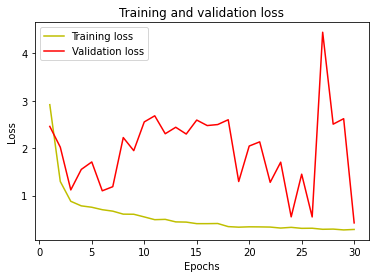

In [11]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

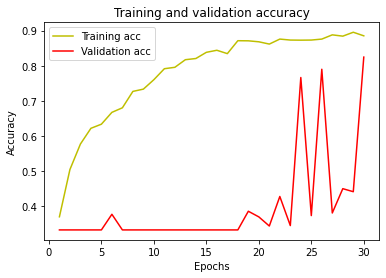

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
prediction_NN = cnn_model.predict(train_generator)
prediction_NN = np.argmax(prediction_NN, axis=-1)

KeyboardInterrupt: 

In [29]:
true_labels = train_generator.classes
predictions = cnn_model.predict_generator(train_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [30]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

### Print confusion matrix to see accuracy 

In [45]:
import sklearn
cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
print(cm)

[[515 292 273]
 [552 247 281]
 [521 285 274]]


<AxesSubplot:>

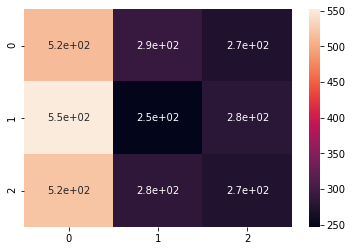

In [41]:
sns.heatmap(cm,annot=True)